<a href="https://colab.research.google.com/github/jackelinegregorio/medical-cost-eda-regression/blob/main/Medical_Cost_Personal_Datasets_(Regress%C3%A3o_Linear).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Link do dataset: https://www.kaggle.com/datasets/mirichoi0218/insurance

Glossário das colunas:

*   Age: Idade do beneficiário principal;
*   Sex: Sexo do contratante do seguro, feminino/masculino;
*   Bmi: Índice de massa corporal, fornecendo uma compreensão do corpo, pesos relativamente altos ou baixos em relação à altura,
índice objetivo de peso corporal (kg/m^2) usando a relação altura / peso, idealmente 18,5 a 24,9;
*   Children: Número de filhos cobertos pelo seguro saúde e número de dependentes;
*   Smoker: Se fuma ou não;
*   Region: A área residencial do beneficiário nos EUA, nordeste, sudeste, sudoeste, noroeste;
*   Charges (Encargos): custos médicos individuais faturados pelo seguro de saúde.

O objetivo desse dataset é fazer uma análise exploratória sobre a modelagem de uma regressão linear em um conjunto de dados, visando obter com melhor precisão dos custos de seguro.

In [36]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from yellowbrick.regressor import PredictionError

Lendo o dataset

In [2]:
medical = pd.read_csv("insurance.csv")

Visualizando as primeiras 5 linhas

In [ ]:
medical.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


Verificando os tipos de dados de cada coluna

In [ ]:
medical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


Verificando se há valores nulos

In [ ]:
medical.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

Quantidade de linhas e colunas

In [ ]:
medical.shape

(1338, 7)

Informação estatística do nosso dataset e no formato de int.

In [ ]:
medical.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


Podemos ver que a média da idade é 39 anos, a pessoa mais nova tem 18 anos e a mais velha tem 64 anos, e pode-se ver também que a maior parte das pessoas tem 51 anos, cerca de 75%. Então já é possível ver que as pessoas novas são minoria nesse dataset. 
A média de filho que as pessoas têm é um, o minímo é nenhum e o máximo são 5 filhos. 
Um ponto importante a se observar é que, cerca de 75% das pessoas tem o custo de 16.639,00 dólares com custo médico individual, que é um custo alto. Em comparação com as pessoas mais novas, o custo chega a 4.740,00 dólares, o que resulta em 4x a menos de custo.

Agora fazemos análise estatística do tipo object.

In [ ]:
medical.describe(include = "object")

,sex,smoker,region
count,1338,1338,1338
unique,2,2,4
top,male,no,southeast
freq,676,1064,364


Pela descrição temos que há mais homens no nosso dataset, a maioria das pessoas não fumam e a maior parte delas são do sudeste.

In [ ]:
numeric_col = ["age","bmi","children","charges"]
object_col = ["sex", "smoker", "region"]

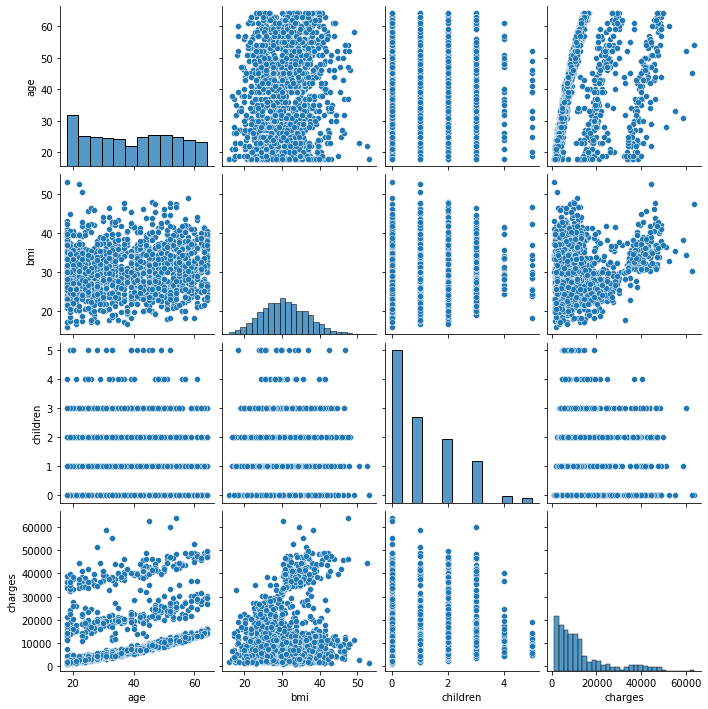

In [ ]:
sns.pairplot(medical[numeric_col], height = 2.5)
plt.plot()
plt.show()

Plotando gráfico de dispersão entre as váriaveis *bmi* e *charges*

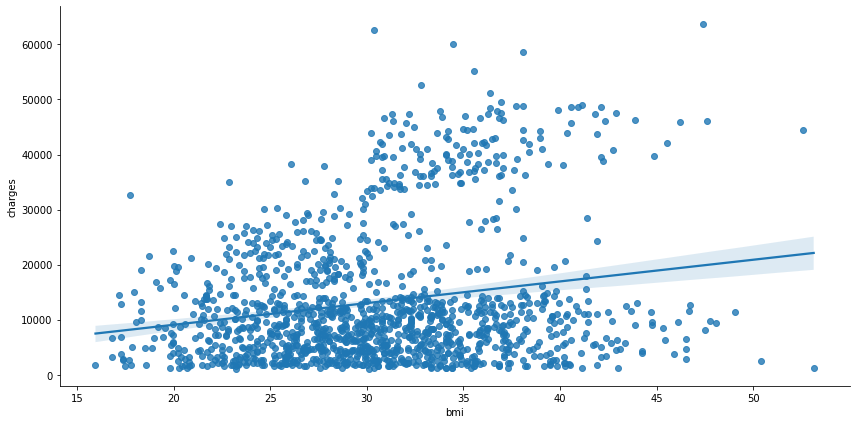

In [ ]:
sns.lmplot(x='bmi',y='charges',data = medical,aspect=2,height=6)

In [3]:
from sklearn.preprocessing import LabelEncoder
lab = LabelEncoder()
medical["sex"] = lab.fit_transform(medical.smoker)

In [ ]:
medical.head()

,age,bmi,children,smoker,region,charges,sex_0,sex_1,sex
0,19,27.900,0,yes,southwest,16884.92400,1,0,1
1,18,33.770,1,no,southeast,1725.55230,0,1,0
2,28,33.000,3,no,southeast,4449.46200,0,1,0
3,33,22.705,0,no,northwest,21984.47061,0,1,0
4,32,28.880,0,no,northwest,3866.85520,0,1,0


Agora plotamos o gráfico da nossa variável categórica, onde **1** representa as pessoas que **fumam** e **0** representa os que **não fumam**.

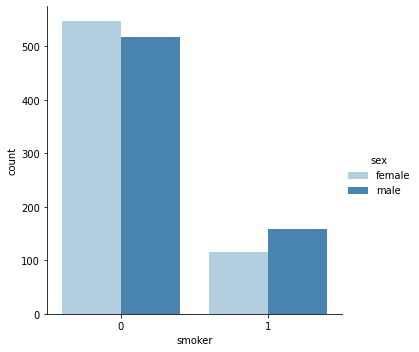

In [ ]:
sns.catplot(x="smoker", kind="count", hue = "sex", palette="Blues", data=medical)

In [ ]:
medical_corr = medical.corr()

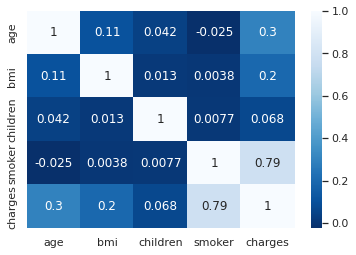

In [ ]:
corr = medical.corr()
sns.heatmap(corr, cmap = 'Blues_r', annot= True);

As correlações que temos é:
*   O custo médico individual tem forte correlação com o fato do indivíduo ser fumante


In [ ]:
medical.groupby('smoker').agg(['mean','min','max'])['charges']

,mean,min,max
smoker,,,
0,8434.268298,1121.8739,36910.60803
1,32050.231832,12829.4551,63770.42801


Para contribuir com a nossa afirmação, vemos que quem fuma tem quase 2x mais de gastos (max), o min tem uma diferença maior, sendo 10x mais comparado as pessoas que não fumam. O mais importante é a média, no caso, as pessoas que não fumam gastam em média 8.400,00 dólares, enquanto quem fuma tem o custo de 32.000,00 dólares em média.

In [ ]:
df_children = medical.groupby('children').agg(['mean','min','max'])['charges']
df_children

,mean,min,max
children,,,
0,12365.975602,1121.8739,63770.42801
1,12731.171832,1711.0268,58571.07448
2,15073.563734,2304.0022,49577.66240
3,15355.318367,3443.0640,60021.39897
4,13850.656311,4504.6624,40182.24600
5,8786.035247,4687.7970,19023.26000


Text(0.5, 1.0, 'Charges & Bmi')

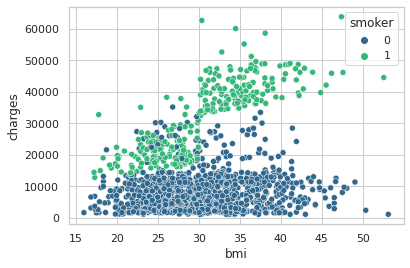

In [ ]:
sns.scatterplot(x='bmi',y="charges", data=medical,palette='viridis',hue='smoker')
ax.set_title("Charges & Bmi")

Text(0.5, 1.0, 'Charges & Age')

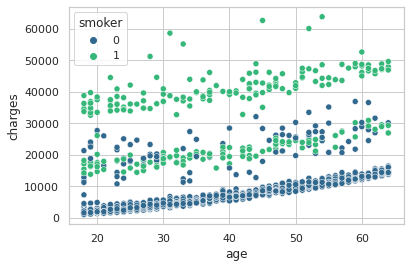

In [ ]:
sns.scatterplot(x='age',y="charges", data=medical,palette='viridis',hue='smoker')
ax.set_title("Charges & Age")

Agora vamos separar as idades dos pacientes por intervalo de idade.

In [ ]:
age_18_25 = medical.age[(medical.age >= 18) & (medical.age <= 25)]
age_26_35 = medical.age[(medical.age >= 26) & (medical.age <= 35)]
age_36_45 = medical.age[(medical.age >= 36) & (medical.age <= 45)]
age_46_55 = medical.age[(medical.age >= 46) & (medical.age <= 55)]
age_55above = medical.age[(medical.age >= 55)]

In [ ]:
x_age = ['18-25', '26-35', '36-45', '46-55', '55+']
y_age = [len(age_18_25.values), len(age_26_35.values), len(age_36_45.values), len(age_46_55.values),
     len(age_55above.values)]

px.bar(data_frame = medical, x = x_age, y = y_age, color = x_age,
       title = "Número de pacientes por grupo")

Gráfico das três variáveis: custo médico, sexo da pessoa e o índice da massa corporal.

In [ ]:
px.scatter(data_frame = medical, x = 'bmi', y = 'charges', color = 'sex')

In [ ]:
px.box(x = "sex", y = "charges", data_frame = medical)

In [ ]:
sns.catplot(x = "sex", y = "charges", hue = "smoker", data = medical, kind = "box", height = 6, aspect = 2)
plt.show()

Gráfico do índice da massa corpotal, o custo médico e idade da criança.

In [ ]:
px.scatter(data_frame = medical, x = "bmi", y = "charges", color = "children", size = "children")

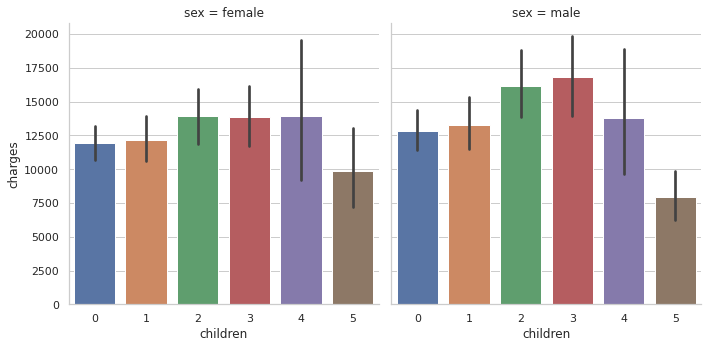

In [ ]:
sns.catplot(x = "children", y = "charges", col = "sex", data = medical, kind = "bar")
plt.show()

Crianças que têm contato com fumantes tem maior custo médico?

In [ ]:
px.box(x = "children", y = "charges", color = "smoker", data_frame = medical)

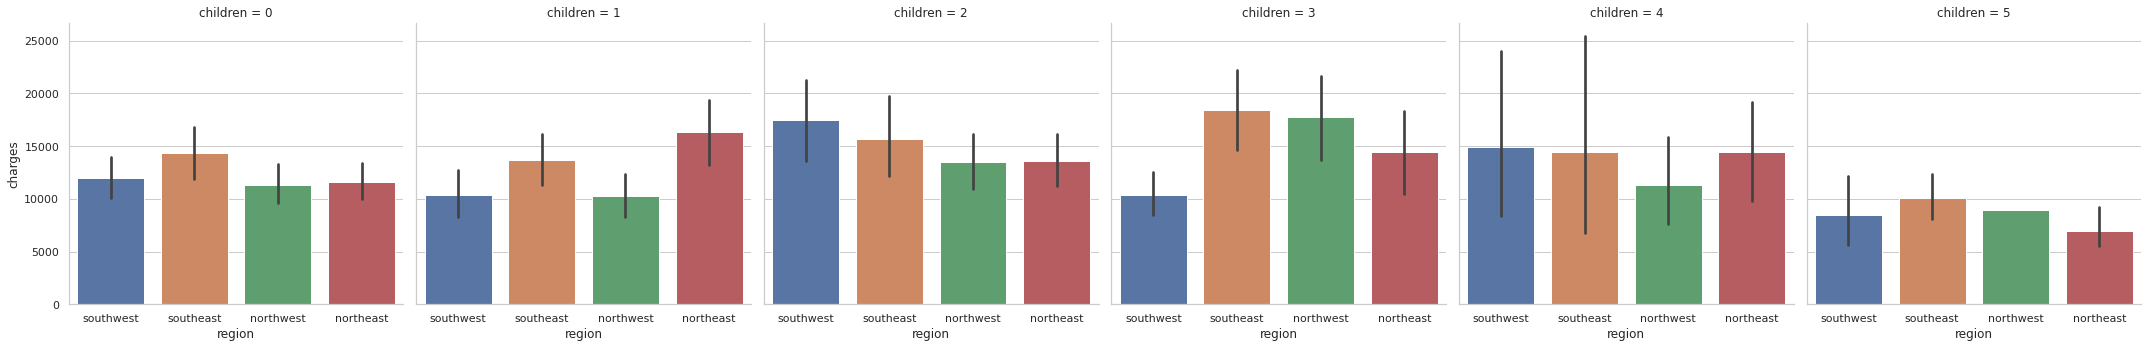

In [ ]:
sns.catplot(x = "region", y = "charges", col = "children", data = medical, kind = "bar")
plt.show()

Converter objects em variável categórica

In [ ]:
medical.sex=medical['sex'].astype("category")
medical.smoker=medical['smoker'].astype("category")
medical.region=medical['region'].astype("category")

In [ ]:
medical[['sex', 'smoker', 'region']] = medical[['sex', 'smoker', 'region']].astype('category')
medical.dtypes

KeyError: ignored

Convertendo em variável categórica

In [7]:
medical[['sex', 'smoker', 'region']] = medical[['sex', 'smoker', 'region']].astype('category')
medical.dtypes

age            int64
sex         category
bmi          float64
children       int64
smoker      category
region      category
charges      float64
dtype: object

Convertendo as variáveis categórias em numéricas

In [12]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
label.fit(medical.sex.drop_duplicates())
medical.sex = label.transform(medical.sex)
label.fit(medical.smoker.drop_duplicates())
medical.smoker = label.transform(medical.smoker)
label.fit(medical.region.drop_duplicates())
medical.region = label.transform(medical.region)
medical.dtypes

age           int64
sex           int64
bmi         float64
children      int64
smoker        int64
region        int64
charges     float64
dtype: object

In [13]:
medical.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,3,16884.92400
1,18,0,33.770,1,0,2,1725.55230
2,28,0,33.000,3,0,2,4449.46200
3,33,0,22.705,0,0,1,21984.47061
4,32,0,28.880,0,0,1,3866.85520


Separando Train e Test

In [14]:
x = medical.drop(["charges"], axis = 1)
y = medical.charges

In [15]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.20, random_state=0)

In [16]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1070, 6)
(268, 6)
(1070,)
(268,)


In [17]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train) 
x_test = scaler.transform(x_test) 

In [24]:
reglinear = LinearRegression()
reglinear.fit(x_train,y_train)

predict = reglinear.predict(x_test)
score = r2_score(y_test,predict)

y_train_pred = reglinear.predict(x_train)

#Coeficiente que corta o eixo y
print(reglinear.score(x_test,y_test))
print(reglinear.intercept_)
#Coeficiente de inclinação da reta
print(reglinear.coef_)

0.7998358738159362
13201.182056009347
[3576.9022537  4754.27144995 2030.22965206  536.52261497 4754.27144995
 -319.03781606]


Cálculo da média do erro absoluto, média do erro ao quadrado e erro qudrático médio.

In [33]:
print("Média do erro absoluto:", metrics.mean_absolute_error(y_test, y_test_pred))
print("Média do erro ao quadrado:", metrics.mean_squared_error(y_test, y_test_pred))
print("Erro quadrático médio:", np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

Média do erro absoluto: 3931.662059737029
Média do erro ao quadrado: 31852109.85791127
Erro quadrático médio: 5643.767346189181


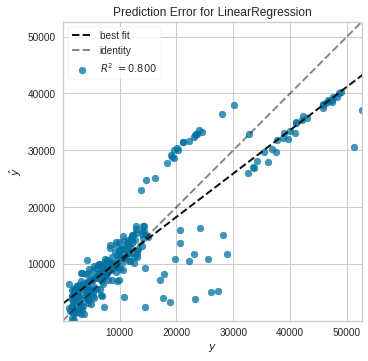

In [37]:
visualizer = PredictionError(reglinear)
visualizer.fit(x_train, y_train)  
visualizer.score(x_test, y_test)        
visualizer.show();

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


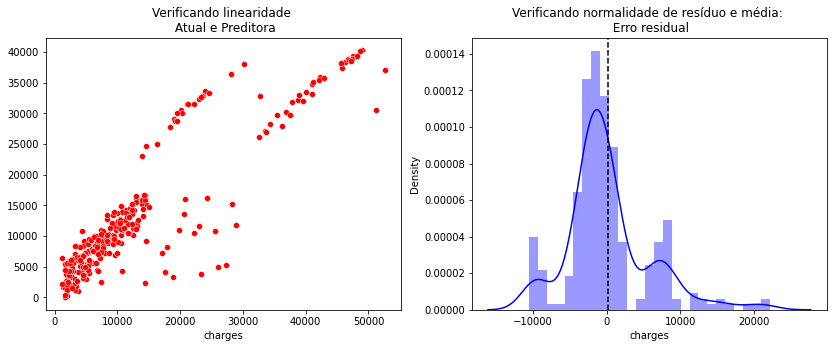

In [20]:
f = plt.figure(figsize=(14,5))
ax = f.add_subplot(121)
sns.scatterplot(y_test,y_test_pred,ax=ax,color='r')
ax.set_title("Verificando linearidade \n Atual e Preditora")

ax = f.add_subplot(122)
sns.distplot((y_test - y_test_pred),ax=ax,color='b')
ax.axvline((y_test - y_test_pred).mean(),color='k',linestyle='--')
ax.set_title("Verificando normalidade de resíduo e média: \n Erro residual");

In [ ]:
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics

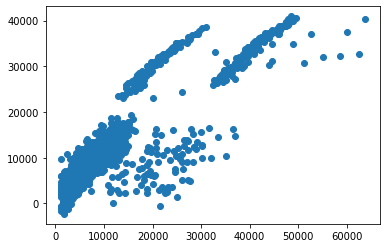

In [ ]:
# Make cross validated predictions
predictions = cross_val_predict(reglinear, x, y, cv=6)
plt.scatter(y, predictions)

In [ ]:
x_array=np.arange(0,len(x_train),1)

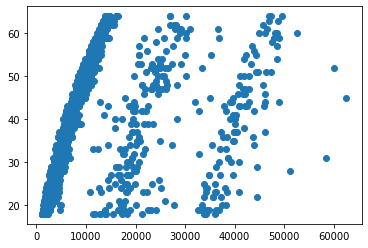

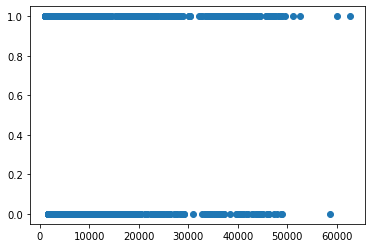

In [ ]:
plt.figure(2)
plt.scatter(y_train, x_train.iloc[:,0].values)
plt.figure(3)
plt.scatter(y_train, x_train.iloc[:,1].values)

Usando Random Forest Regressor

In [30]:
from sklearn.ensemble import RandomForestRegressor

In [35]:
forest = RandomForestRegressor(n_estimators = 100, criterion = 'mse', random_state = 1, n_jobs = -1)
forest.fit(x_train, y_train)
forest_train_pred = forest.predict(x_train)
forest_test_pred = forest.predict(x_test)

print('MSE train data: %.3f, MSE test data: %.3f' % (
mean_squared_error(y_train,forest_train_pred),
mean_squared_error(y_test,forest_test_pred)))
print('R2 train data: %.3f, R2 test data: %.3f' % (
r2_score(y_train,forest_train_pred),
r2_score(y_test,forest_test_pred)))

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


MSE train data: 3537950.315, MSE test data: 20923835.661
R2 train data: 0.975, R2 test data: 0.869


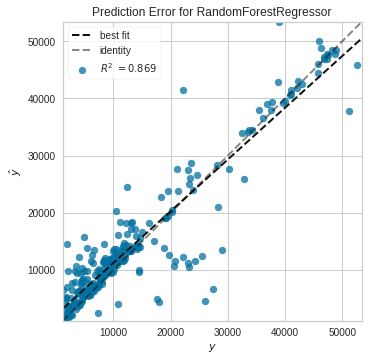

In [38]:
visualizer = PredictionError(forest)
visualizer.fit(x_train, x_train)  
visualizer.score(x_test, y_test)        
visualizer.show();